In [6]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
#The Intuition
#Decompose  complex sound into its frequency components
#Fourier transfrom involves a ourney from time domain to frequency domain
#Check screenshot

#FT compares the original signal with sinusoids of various frequencies
#From this comparison, for each frequency we get a magnitude and a phase
#High magnitude indicates high similarities between the signal and a sinusoid

In [8]:
# load audio file in the player
relative_path = "input-audios/piano_c.wav"
audio_path = os.path.abspath(os.path.join(os.getcwd(), relative_path))
ipd.Audio(audio_path)


In [9]:
# load audio file
signal, sr = librosa.load(audio_path)

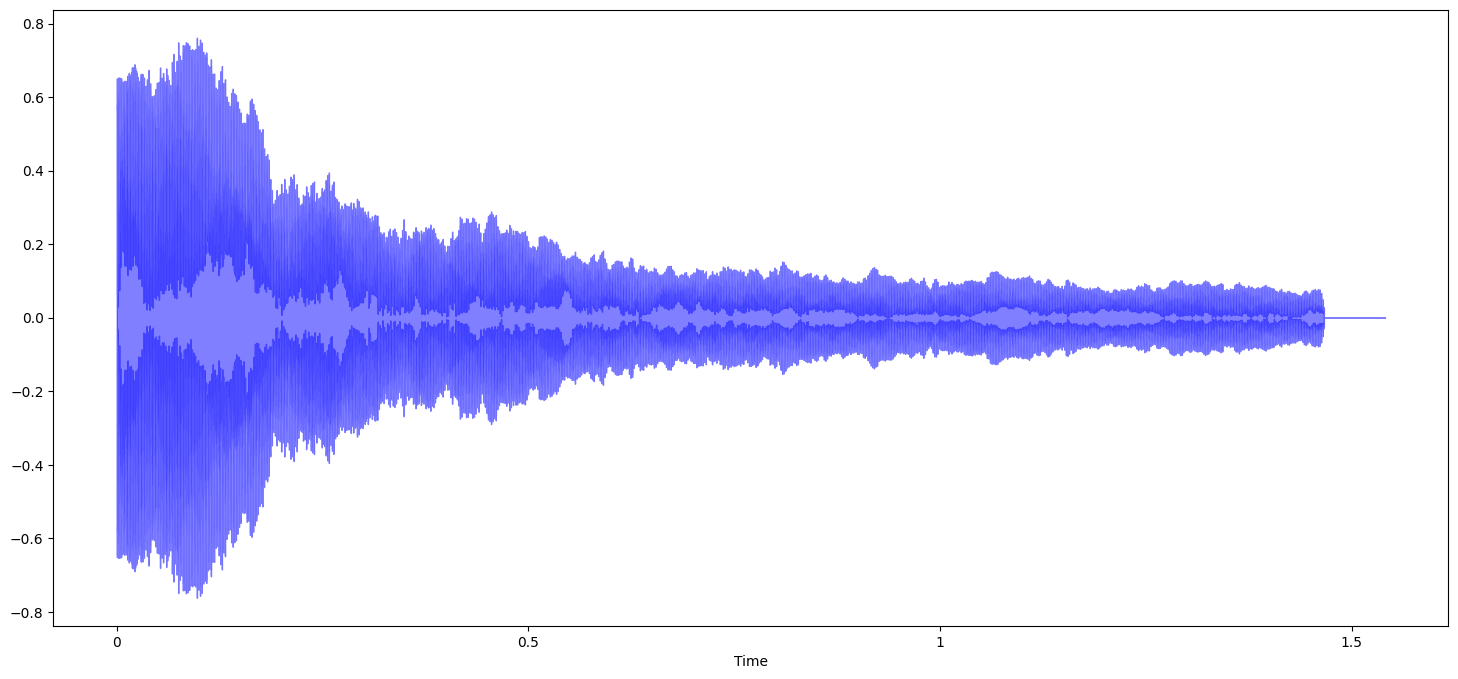

In [12]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5, color='b')
plt.show()

In [13]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft) #y-axis of spectrum
frequency = np.linspace(0, sr, len(magnitude)) #x-axis between 0hz and samling_rate and divide this by number of steps equal to the length of magnitude array

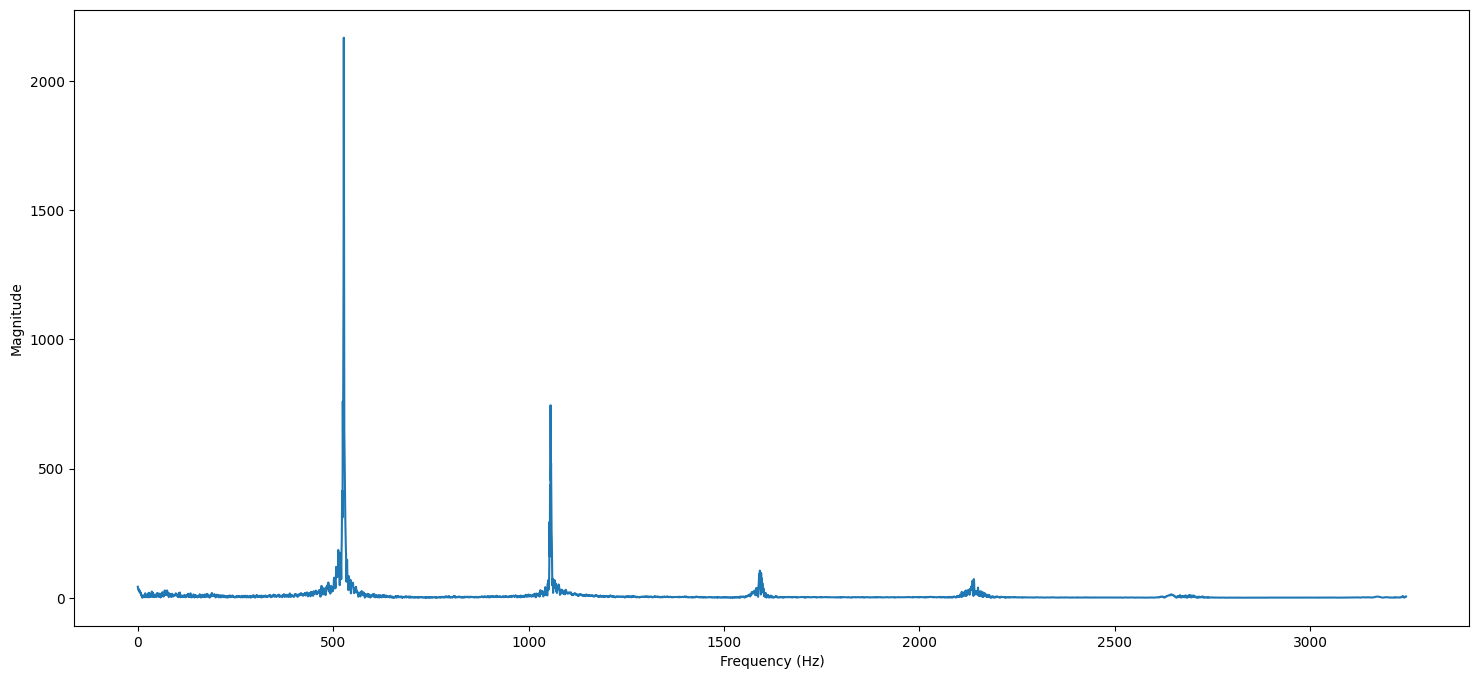

In [14]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [18]:
#Number of samples in signal
len(signal)

33968

In [19]:
#Sampling rate (sr) 22050Hz
#Duration of a sample is inverse of sampling rate
d =  1 / sr
d

4.5351473922902495e-05

In [20]:
#Duration of a cycle for the fundamental frequency of signal which is 523 returns abouut two ms
d_523 = 1 / 523
d_523

0.0019120458891013384

In [21]:
# Zoom in to the wave form and consider 400 samples as these will give us 0.002 seconds whch will give us 10cycles of the waveform
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

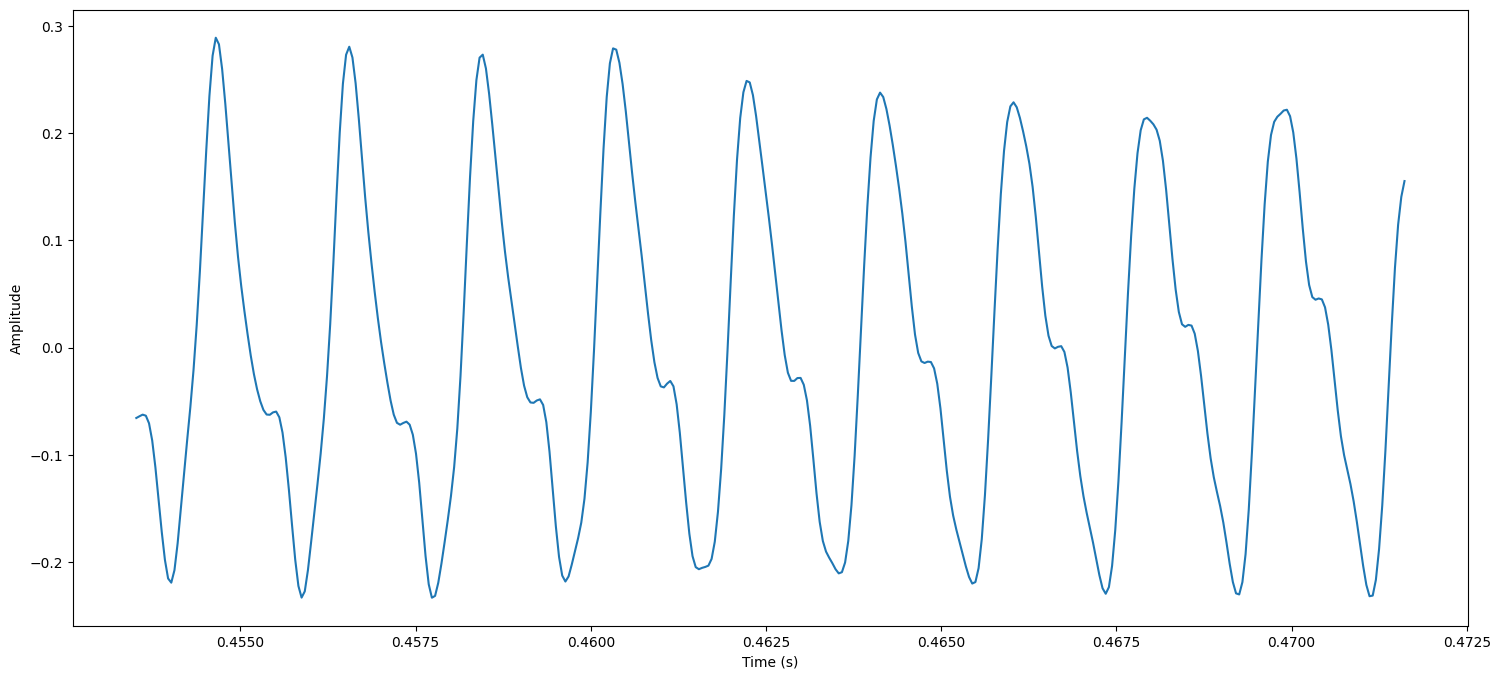

In [22]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) #consider 400samples slicing y axis signal for samples between 10000 and 10400
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [27]:
#Zoom into wavfrom and be at a resolutio to see all the cycles in the wave associated with this sound

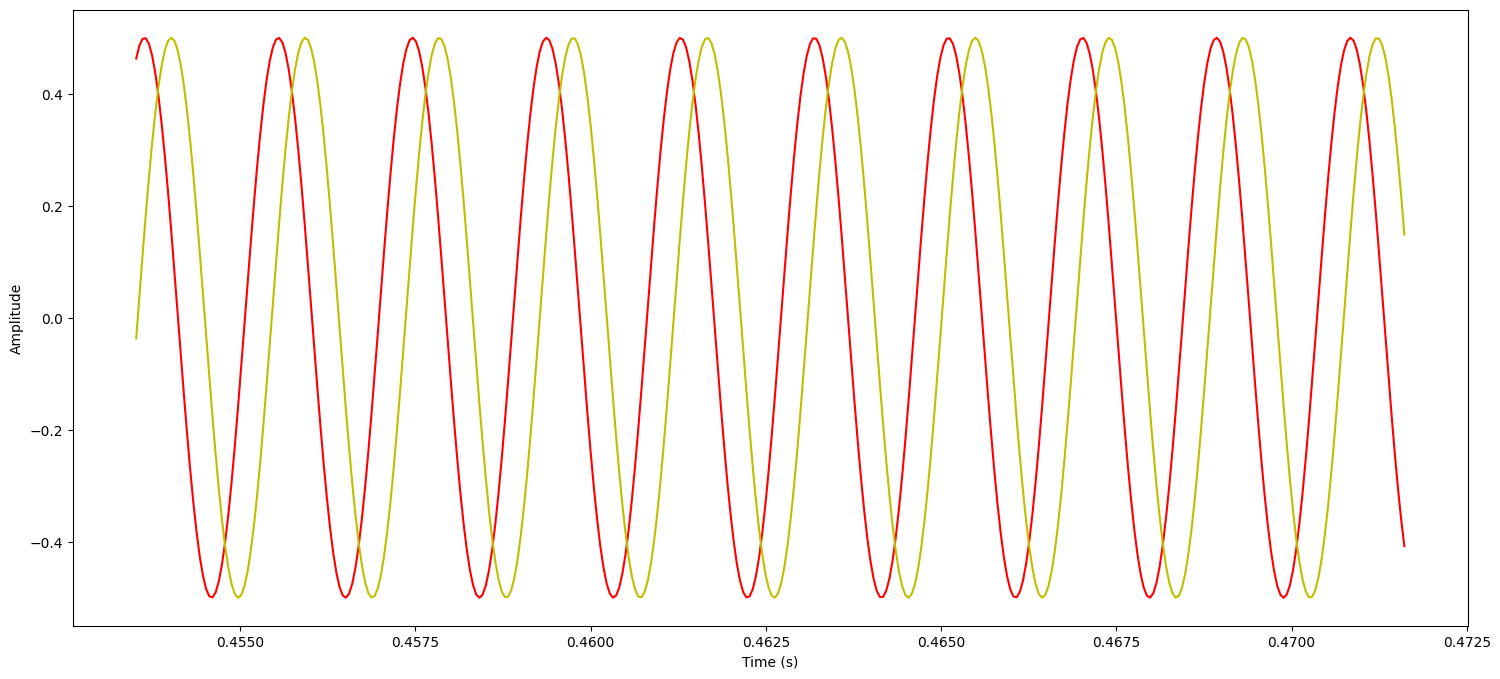

In [26]:
#The above enables us to compare this signal against sinusoids with different frequencies and see the similarities
#Equation for a sine wave
#sin(2π * (ft -φ))
# f - frequency
# t - time
# φ - phase - shifts signal to the right
#create a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
# To move from Time Domain to Frequency Domain we Compare the signal with sinusoids of various frequencies
#For each frequency we get magnitude and phase
#High magnitude indicates high similarities between the signal and a sinusoid

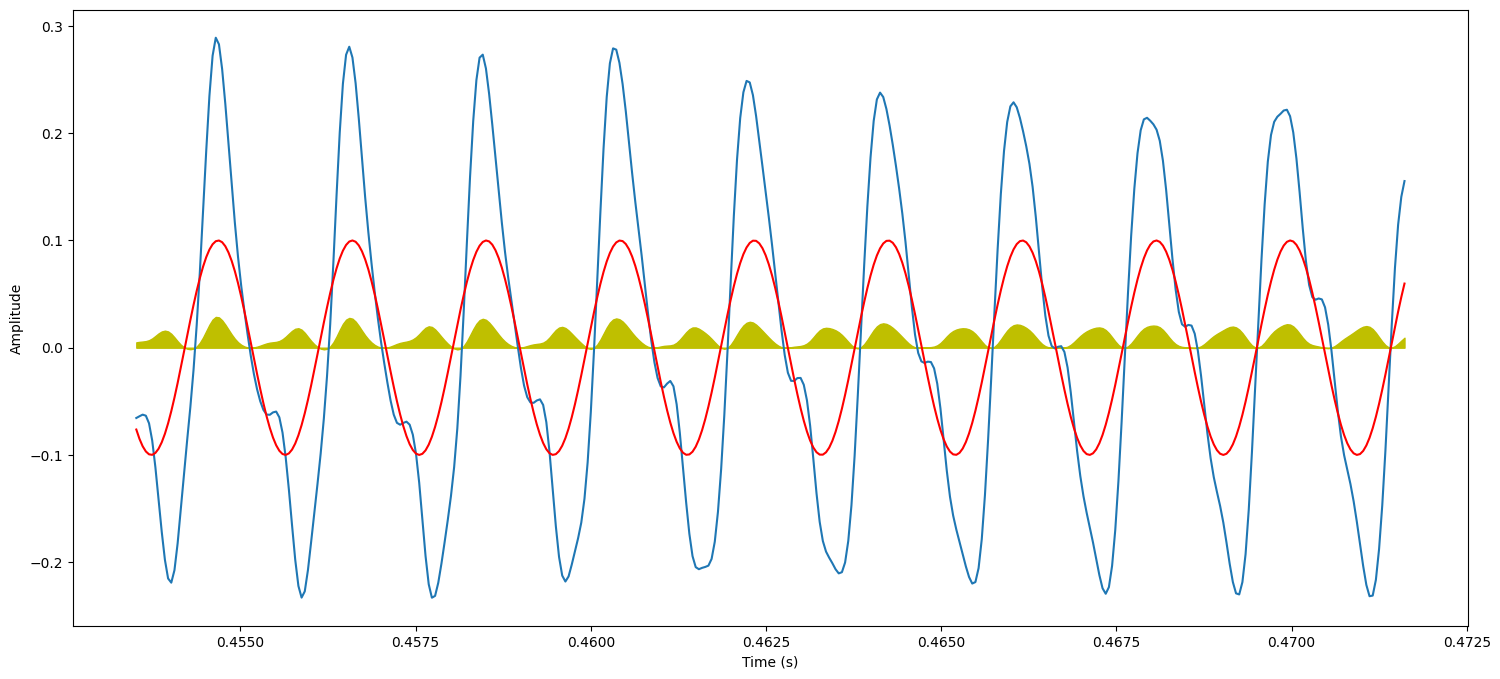

In [31]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) #original signal
plt.plot(t[10000:10400], sin[10000:10400], color="r") #sinusoid
#find similarity by combining the two signals by multiplying them sample by sample
#look at the area below the new combined signal add positive area subtact negative area
plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")
#the higher the positive area between the combined signalls the higher the similarity between the two signals

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()